In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import t
import statsmodels.api as sm

In [108]:
df = pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [181]:
class LinearRegression:
    def __init__(self):
        pass
    
    def get_slope(self,X,Y):
        
        num = (X*Y - Y.mean()*X).sum()
        den = (X*X - X.mean()*X).sum()
        return num/den
    
    def get_std_error_slope(self, X,Y):
        SE = self.get_RSE(X,Y)/(((X-X.mean())**2).sum())**(1/2)
        return SE

    def get_std_error_intercept(self,X,Y):
        SE = self.get_RSE(X,Y)*((1/len(X) + (X.mean()**2)/((X-X.mean())**2).sum()))**(1/2)
        return SE

    def get_confidence_interval_slope(self,X,Y,ci):
        
        lower = t.ppf((1-ci)/2,len(X)-2,loc = self.get_slope(X,Y),scale = self.get_std_error_slope(X,Y))
        upper = t.ppf(1 - (1-ci)/2,len(X)-2,loc = self.get_slope(X,Y),scale = self.get_std_error_slope(X,Y))
       
        return [lower,upper]

    def get_confidence_interval_intercept(self,X,Y,ci):
        
        lower = t.ppf((1-ci)/2,len(X)-1,loc = self.get_intercept(X,Y),scale = self.get_std_error_intercept(X,Y))
        upper = t.ppf(1 - (1-ci)/2,len(X)-1,loc = self.get_intercept(X,Y),scale = self.get_std_error_intercept(X,Y))
       
        return [lower,upper]

    def get_p_value_slope(self,X,Y):
        t_val = (self.get_slope(X,Y) - 0)/self.get_std_error_slope(X,Y)
        return t.sf(abs(t_val),len(X)-2)

    def get_p_value_intercept(self,X,Y):
        t_val = (self.get_intercept(X,Y) - 0)/self.get_std_error_intercept(X,Y)
        return t.sf(abs(t_val),len(X)-2)

    def get_intercept(self,X,Y):
        
        intercept = Y.mean() - self.get_slope(X,Y)*X.mean()
        return intercept
    
    def get_RSE(self,X,Y):
        return (self.get_RSS(X,Y)/(len(X)-2))**(1/2)

    def get_RSS(self,X,Y):
        RSS = ((Y - (self.get_slope(X,Y)*X + self.get_intercept(X,Y)))**2).sum()
        return RSS

    def get_summary(self,X,Y,ci):

        print(f'Slope is {self.get_slope(X,Y)}, with confidence interval of {ci}: ' 
        f'{self.get_confidence_interval_slope(X,Y,ci)}')
        
        print(f'Intercept is {self.get_intercept(X,Y)}, with confidence interval of {ci}: '
        f'{self.get_confidence_interval_intercept(X,Y,ci)}')
    
        print(f'p-value of slope is: {self.get_p_value_slope(X,Y)}')
        print(f'p-value of intercept is: {self.get_p_value_intercept(X,Y)}')
    def plot_relation(self,X,Y,kind = 'scatter'):
        
        
        fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize = (12,4))
        if kind == 'bar':
            ax.bar(X,Y)
        if kind == 'scatter':
            ax[0].scatter(X,Y,5 )
        x = np.linspace(X.min(),X.max(),100)
        
        ax[0].plot(x,self.get_slope(X,Y)*x + self.get_intercept(X,Y), 'orange',linewidth = 3)
        ax[1].hist(X)
        for axes in ax:
            axes.spines['right'].set_visible(False)
            axes.spines['top'].set_visible(False)

        ax[0].set_xlabel(X.name)
        ax[0].set_ylabel(Y.name)

        ax[1].set_xlabel(X.name)
        ax[1].set_ylabel('Count')
        plt.show()

    def get_single_prediction(self,x):
        return self.get_slope()*x + self.get_intercept()
    
    def get_all_predictions(self,X,Y):
        return self.get_slope(X,Y)*X + self.get_intercept(X,Y)

    def get_metrics(self,X,Y):
        RMSE =(((Y - self.get_all_predictions(X,Y))**2).mean())**(1/2)
        MAE = abs(Y - self.get_all_predictions(X,Y)).mean()

        print('Root Mean Square error -> ' + str(round(RMSE,2)))
        print('Mean absolute error -> ' + str(round(MAE,2)))

In [182]:
a = LinearRegression()

## Let's plot the relation between each independent variable and the output variable (MEDV)

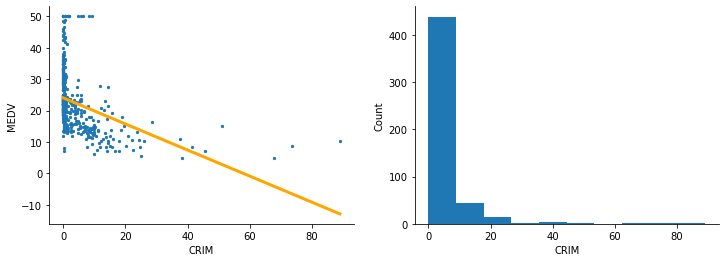

Slope is -0.4151902779150923, with confidence interval of 0.9: [-0.4875164717975388, -0.34286408403264573]
Intercept is 24.033106174123905, with confidence interval of 0.9: [23.35889072685313, 24.70732162139468]
p-value of slope is: 5.869935410970116e-20
p-value of intercept is: 6.70861743874557e-228


In [196]:
#CRIM: per capita crime rate by town

a.plot_relation(df['CRIM'],df['MEDV'])
a.get_summary(df['CRIM'],df['MEDV'],ci = 0.9)

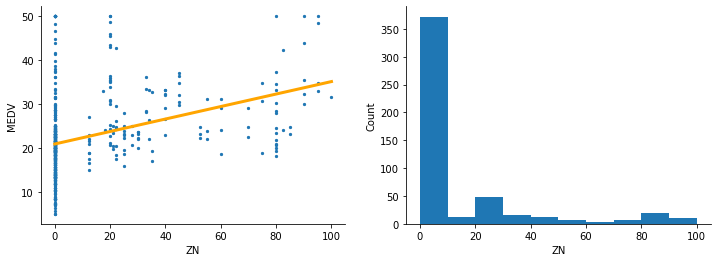

Slope is 0.14213999415535386, with confidence interval of 0.9: [0.11513977737569003, 0.1691402109350177]
Intercept is 20.91757911779986, with confidence interval of 0.9: [20.21765914269022, 21.6174990929095]
p-value of slope is: 2.8567920765410234e-17
p-value of intercept is: 4.744901466020322e-195


In [184]:
# ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
a.plot_relation(df['ZN'],df['MEDV'])

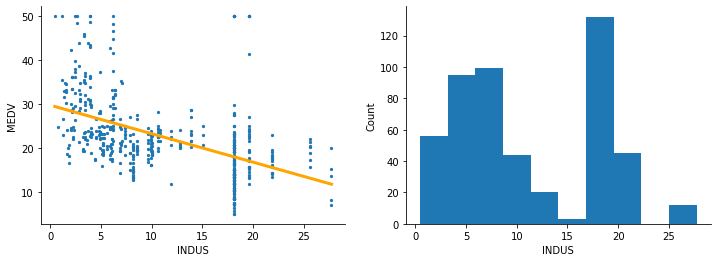

Slope is -0.6484900536157248, with confidence interval of 0.95: [-0.7511731253934488, -0.5458069818380007]
Intercept is 29.754896511928635, with confidence interval of 0.95: [28.412150384584667, 31.097642639272603]
p-value of slope is: 2.450129990872044e-31
p-value of intercept is: 3.352493365533948e-173


In [185]:
# INDUS: proportion of non-retail business acres per town

a.plot_relation(df['INDUS'],df['MEDV'])

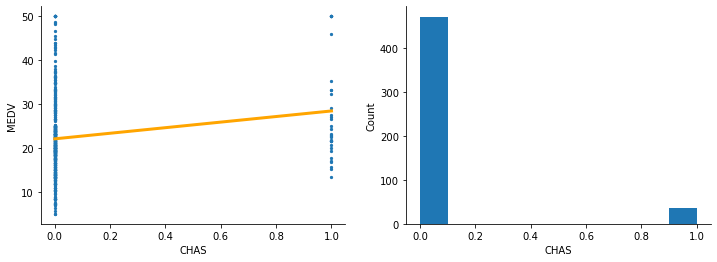

Slope is 6.346157112526511, with confidence interval of 0.9: [3.7293961032230594, 8.962918121829961]
Intercept is 22.09384288747349, with confidence interval of 0.9: [21.405632473413263, 22.782053301533715]
p-value of slope is: 3.695311585260164e-05
p-value of intercept is: 3.5013942684439414e-208


In [186]:
# CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

a.plot_relation(df['CHAS'],df['MEDV'])
a.get_summary(df['CHAS'],df['MEDV'],ci = 0.9)

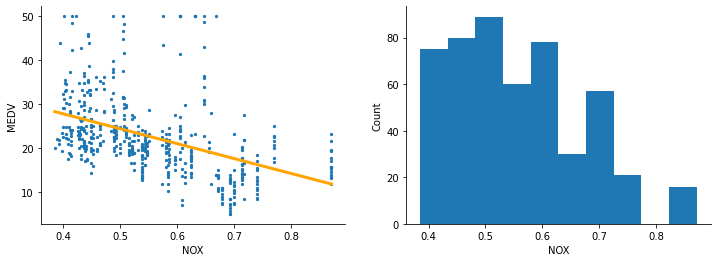

In [187]:
# NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
a.plot_relation(df['NOX'],df['MEDV'])

### Claramente existe uma correlação negativa entre as variáveis (-0.42), o que faz sentido dado que óxido nítrico é um composto tóxico, logo desvaloriza o preço das casas na redondeza. A partir de 0.68 espera-se que o preço médio das casas vendidas caia substancialmente. 
(existe um  número considerável de dados de 0.6 para cima, logo nossa hipótese de que 0.68 é um ponto de decisão é corroborada)

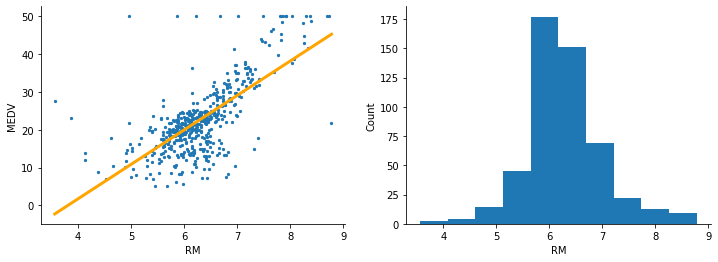

In [188]:
# RM: average number of rooms per dwelling
a.plot_relation(df['RM'], df['MEDV'])


### Existe de fato uma tendência de quanto maior o número de cômodos, mais cara é a casa (coorelação = 0.695). Não noto nenhum ponto que indique um limiar de decisão, parece que a tendência se mantém. A única coisa que me é estranha é que em lugares mais pobres, existem casas com muitos cômodos que são compartilhadas entre famílias (cortiços, casas na união soviética...). Será que essa tendência se mantém nesses lugares?

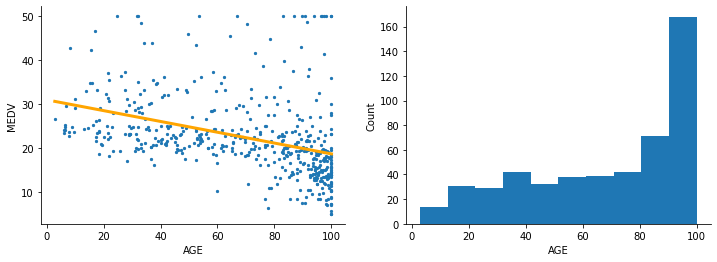

In [189]:
# AGE: proportion of owner-occupied units built prior to 1940
a.plot_relation(df['AGE'], df['MEDV'])

### Será que a porcentagem das casas construídas antes de 1940, que estão ocupadas numa certa área influencia no preço médio das casas na área? Parece que não, pelo menos de 20-75%... A partir de 80% as coisas mudam um pouco: o preço médio das casas cai quando muitas casas antigas estão sendo ocupadas. Por que?

dúvida: casas de antes de 1940 reformadas e restauradas contam aqui também?

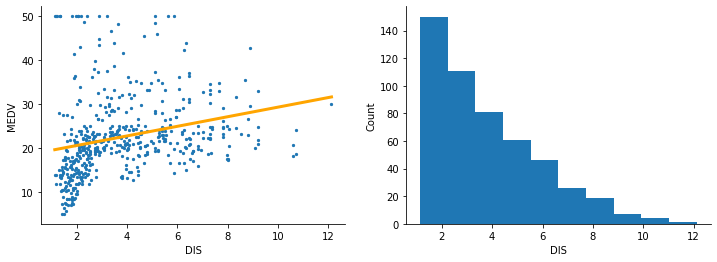

In [190]:
#DIS: weighted distances to five Boston employment centres
a.plot_relation(df['DIS'], df['MEDV'])

### De fato, centros de emprego são serviços usados por uma população com nível de escolaridade menor, o que se relaciona com renda menor. Faz sentido esses centros estarem posicionados em regiões próximas as casas de seu público alvo, logo vemos uma tendência de quanto menor a distância, menor o preço médio das casas. Esse fenômeno ocorre até uma distância de 5. A partir de 6 não vemos uma correlação tão clara e devemos ter cuidado com qualquer conclusão pois existem muitos poucos dados (ver histograma)

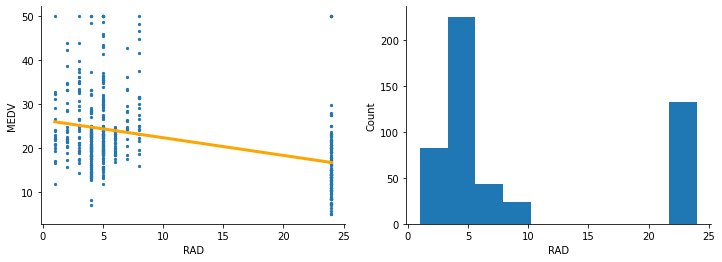

In [191]:
# RAD: index of accessibility to radial highways
a.plot_relation(df['RAD'],df['MEDV'])


### Não parece fazer muita diferença para um RAD baixo. Porém para o RAD alto, podemos concluir que o preço médio tende a abaixar bastante. Provavelmente se é muito difícil ter acesso a rodovias essas zonas são mais afastadas, talvez sejam zonas rurais, o que de fato abaixa o preço do metro quadrado. Não temos dados intermediários, o que dificulta maiores conclusões.

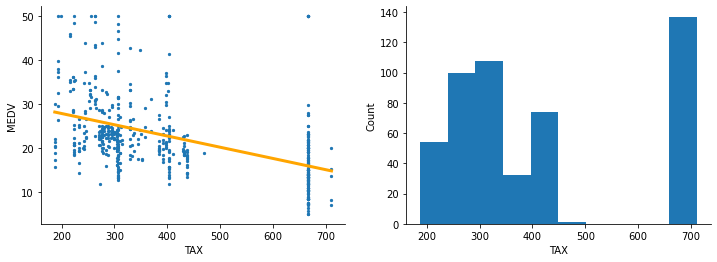

In [192]:
# TAX: full-value property-tax rate per $10,000 [$/10k]
a.plot_relation(df['TAX'],df['MEDV'])

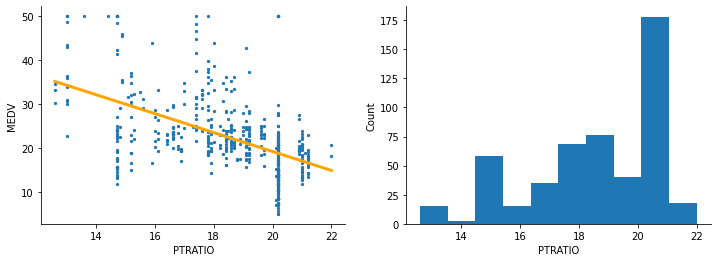

In [193]:
# PTRATIO: pupil-teacher ratio by town
a.plot_relation(df['PTRATIO'],df['MEDV'])


### Esperamos que quando um único professor tiver que dar atenção a muitos alunos, os resultados deles serão piores, o que reflete na renda e consequentemente no preço das casas. Podemos ver que para PTRATIO acima de 20, os preços caem muito. Além disso, existem muitos dados com PTRATIO acima de 20, o que dá mais consistencia para essa teoria.  

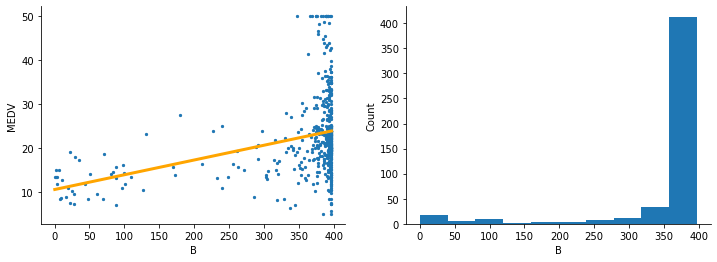

In [195]:
# B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

a.plot_relation(df['B'],df['MEDV'])

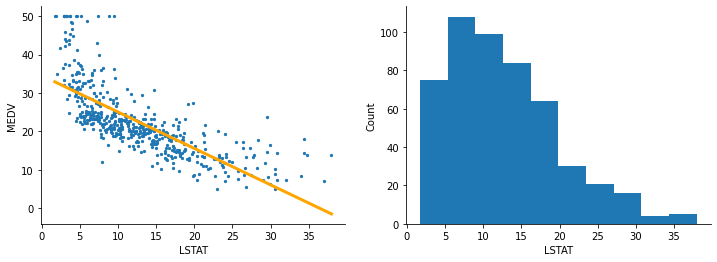

In [180]:
# LSTAT: % lower status of the population. 
# Proportion of population that is lower status = 1/2 * (proportion of adults without some 
# high school education and proportion of male workers classified as laborers
a.plot_relation(df['LSTAT'],df['MEDV'])

In [23]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469
